# **Artificial Impressions: Examining AI's Impact on Image Perception**

# **Introduction**

# Data Exploration

### Importing Libraries

In [ ]:
!pip install pyfixest  # This installs the pyfixest package
!pip install pingouin  # This installs the pingouin package
!pip install stargazer  # This installs the stargazer package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels
import plotly.graph_objs as go
from pyfixest.estimation import feols
from pyfixest import etable  # Corrected import statement
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import TTestPower
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

### Data Loading & Cleaning

In [ ]:
# Loading the data (Results from the Survey)
df = pd.read_csv("/content/Survey on Art Appreciation Across Genres_March 6, 2024_14.46.csv")
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q42_1,Q43_1,Q44_1,Q45_1,Q46_1,Q47_1,Q48_1,FL_6_DO,"Now,wearegoingtoshowyousomeAIgeneratedartwork._DO","Now,wearegoingtoshowyousomeartwork._DO"
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"On a scale of 0 to 100, how much do you like t...","On a scale of 0 to 100, how much do you like t...","On a scale of 0 to 100, how much do you like t...","On a scale of 0 to 100, how much do you like t...","On a scale of 0 to 100, how much do you like t...","On a scale of 0 to 100, how much do you like t...","On a scale of 0 to 100, how much do you like t...",FL_6 - Block Randomizer - Display Order,"Now, we are going to show you some AI generate...","Now, we are going to show you some artwork. - ..."
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID68_1""}","{""ImportId"":""QID69_1""}","{""ImportId"":""QID70_1""}","{""ImportId"":""QID71_1""}","{""ImportId"":""QID72_1""}","{""ImportId"":""QID73_1""}","{""ImportId"":""QID74_1""}","{""ImportId"":""FL_6_DO""}","{""ImportId"":""BL_87fwM5P0vrKbtRA_DO""}","{""ImportId"":""BL_elMwmDZKkA2tY6W_DO""}"
2,2024-02-27 15:41:48,2024-02-27 15:42:30,IP Address,128.197.29.239,100,42,True,2024-02-27 15:42:31,R_3xAe7rrjjOl3cvI,NaN,...,NaN,NaN,7,88,NaN,97,NaN,FL_18,NaN,Q45|Q36|Q32|Q47|Q40|Q34|Q29|Q44|Q37|Q33
3,2024-02-27 16:32:59,2024-02-27 16:34:44,IP Address,128.197.29.243,100,105,True,2024-02-27 16:34:44,R_1uyY8diTp1PSRsw,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL_14,Q19|Q8|Q26|Q6|Q13|Q21|Q17|Q18|Q22|Q14,NaN
4,2024-02-27 18:20:24,2024-02-27 18:21:08,IP Address,12.74.53.20,100,44,True,2024-02-27 18:21:09,R_7Osf8LBzuHb7Njb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL_14,Q9|Q10|Q6|Q16|Q12|Q18|QID78|Q21|Q13|Q19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2024-02-28 03:17:40,2024-02-28 03:18:01,IP Address,117.102.155.245,57,20,False,2024-03-06 03:18:01,R_4jjMsY2lJHDNDrj,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL_14,Q25|Q18|Q23|Q12|Q20|Q22|Q9|Q5|Q26|Q16,NaN
179,2024-02-28 07:22:24,2024-02-28 07:22:36,IP Address,128.197.29.249,55,11,False,2024-03-06 07:23:08,R_5LH9WiuXdNPkMjW,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL_18,NaN,NaN
180,2024-02-28 10:02:17,2024-02-28 10:02:45,IP Address,128.197.29.240,57,28,False,2024-03-06 10:08:52,R_6Mi6hT5rdvgips5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL_14,Q11|Q5|Q19|Q10|Q9|Q23|Q22|Q6|Q17|Q24,NaN
181,2024-02-28 10:46:46,2024-02-28 10:47:20,IP Address,204.8.153.51,57,34,False,2024-03-06 10:47:24,R_3p2TYISUqsWqibH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL_18,NaN,Q32|Q48|Q38|Q37|Q36|Q43|Q29|Q46|Q42|Q47


In [ ]:
# Getting rid of the first two redundant rows
df = df.drop(df.index[0:2])
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q42_1,Q43_1,Q44_1,Q45_1,Q46_1,Q47_1,Q48_1,FL_6_DO,"Now,wearegoingtoshowyousomeAIgeneratedartwork._DO","Now,wearegoingtoshowyousomeartwork._DO"
2,2024-02-27 15:41:48,2024-02-27 15:42:30,IP Address,128.197.29.239,100,42,True,2024-02-27 15:42:31,R_3xAe7rrjjOl3cvI,NaN,...,NaN,NaN,7,88,NaN,97,NaN,FL_18,NaN,Q45|Q36|Q32|Q47|Q40|Q34|Q29|Q44|Q37|Q33
3,2024-02-27 16:32:59,2024-02-27 16:34:44,IP Address,128.197.29.243,100,105,True,2024-02-27 16:34:44,R_1uyY8diTp1PSRsw,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL_14,Q19|Q8|Q26|Q6|Q13|Q21|Q17|Q18|Q22|Q14,NaN
4,2024-02-27 18:20:24,2024-02-27 18:21:08,IP Address,12.74.53.20,100,44,True,2024-02-27 18:21:09,R_7Osf8LBzuHb7Njb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL_14,Q9|Q10|Q6|Q16|Q12|Q18|QID78|Q21|Q13|Q19,NaN
5,2024-02-27 18:20:27,2024-02-27 18:21:21,IP Address,128.197.29.246,100,54,True,2024-02-27 18:21:21,R_3NVSnApOBSug4Wa,NaN,...,59,NaN,NaN,NaN,20,11,15,FL_18,NaN,Q29|Q42|Q46|Q39|Q40|Q36|Q32|Q35|Q47|Q48
6,2024-02-27 18:20:23,2024-02-27 18:21:25,IP Address,128.197.29.243,100,62,True,2024-02-27 18:21:26,R_5NLpdRxCZbqhJda,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL_14,Q17|Q6|Q16|Q15|QID78|Q24|Q19|Q9|Q23|Q18,NaN


In [ ]:
# Inspecting all the columns in the data
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q4_13_TEXT', 'Q5_1', 'Q6_1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1',
       'Q12_1', 'Q13_1', 'Q14_1', 'Q15_1', 'Q16_1', 'Q17_1', 'Q18_1', 'Q19_1',
       'Q20_1', 'Q21_1', 'Q22_1', 'Q23_1', 'Q24_1', 'Q25_1', 'Q26_1', 'Q27_1',
       'Q28_1', 'Q29_1', 'Q30_1', 'Q31_1', 'Q32_1', 'Q33_1', 'Q34_1', 'Q35_1',
       'Q36_1', 'Q37_1', 'Q38_1', 'Q39_1', 'Q40_1', 'Q41_1', 'Q42_1', 'Q43_1',
       'Q44_1', 'Q45_1', 'Q46_1', 'Q47_1', 'Q48_1', 'FL_6_DO',
       'Now,wearegoingtoshowyousomeAIgeneratedartwork._DO',
       'Now,wearegoingtoshowyousomeartwork._DO'],
      dtype='object')

In [ ]:
# Dropping columns that we don't need
df.drop(["Status", "IPAddress", "ResponseId", "RecipientLastName",
         "RecipientFirstName", "RecipientEmail", "ExternalReference",
         "LocationLatitude", "LocationLongitude", "DistributionChannel",
         "UserLanguage", "RecordedDate", "Q4_13_TEXT", "FL_6_DO", "Progress"],
        axis=1, inplace=True)

In [ ]:
# Checking the columns once again
df.columns

Index(['StartDate', 'EndDate', 'Duration (in seconds)', 'Finished', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5_1', 'Q6_1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1',
       'Q12_1', 'Q13_1', 'Q14_1', 'Q15_1', 'Q16_1', 'Q17_1', 'Q18_1', 'Q19_1',
       'Q20_1', 'Q21_1', 'Q22_1', 'Q23_1', 'Q24_1', 'Q25_1', 'Q26_1', 'Q27_1',
       'Q28_1', 'Q29_1', 'Q30_1', 'Q31_1', 'Q32_1', 'Q33_1', 'Q34_1', 'Q35_1',
       'Q36_1', 'Q37_1', 'Q38_1', 'Q39_1', 'Q40_1', 'Q41_1', 'Q42_1', 'Q43_1',
       'Q44_1', 'Q45_1', 'Q46_1', 'Q47_1', 'Q48_1',
       'Now,wearegoingtoshowyousomeAIgeneratedartwork._DO',
       'Now,wearegoingtoshowyousomeartwork._DO'],
      dtype='object')

In [ ]:
# Inspecting the dataframe
print("No. of Total Reponses:", df.shape[0])
df.head()

No. of Total Reponses: 181


,StartDate,EndDate,Duration (in seconds),Finished,Q1,Q2,Q3,Q4,Q5_1,Q6_1,...,Q41_1,Q42_1,Q43_1,Q44_1,Q45_1,Q46_1,Q47_1,Q48_1,"Now,wearegoingtoshowyousomeAIgeneratedartwork._DO","Now,wearegoingtoshowyousomeartwork._DO"
2,2024-02-27 15:41:48,2024-02-27 15:42:30,42,True,18 - 24,Male,Yes,Questrom School of Business,NaN,NaN,...,NaN,NaN,NaN,7,88,NaN,97,NaN,NaN,Q45|Q36|Q32|Q47|Q40|Q34|Q29|Q44|Q37|Q33
3,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,NaN,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q19|Q8|Q26|Q6|Q13|Q21|Q17|Q18|Q22|Q14,NaN
4,2024-02-27 18:20:24,2024-02-27 18:21:08,44,True,18 - 24,Male,Yes,Questrom School of Business,NaN,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q9|Q10|Q6|Q16|Q12|Q18|QID78|Q21|Q13|Q19,NaN
5,2024-02-27 18:20:27,2024-02-27 18:21:21,54,True,18 - 24,Female,Yes,Questrom School of Business,NaN,NaN,...,NaN,59,NaN,NaN,NaN,20,11,15,NaN,Q29|Q42|Q46|Q39|Q40|Q36|Q32|Q35|Q47|Q48
6,2024-02-27 18:20:23,2024-02-27 18:21:25,62,True,25 - 34,Male,Yes,Questrom School of Business,NaN,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q17|Q6|Q16|Q15|QID78|Q24|Q19|Q9|Q23|Q18,NaN


In [ ]:
# Filtering out the surveys that were not completed
df = df[df["Finished"] == "True"]
print("No. of Total Reponses:", df.shape[0])

No. of Total Reponses: 165


In [ ]:
# Renaming columns
df.columns = ['StartDate', 'EndDate', 'Duration (in seconds)', 'Finished',
              'Age', 'Gender', 'Attend_BU', 'BU_School', 'Q5_1', 'Q6_1', 'Q7_1', 'Q8_1',
              'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1', 'Q13_1', 'Q14_1', 'Q15_1', 'Q16_1',
              'Q17_1', 'Q18_1', 'Q19_1', 'Q20_1', 'Q21_1', 'Q22_1', 'Q23_1', 'Q24_1',
              'Q25_1', 'Q26_1', 'Q27_1', 'Q28_1', 'Q29_1', 'Q30_1', 'Q31_1', 'Q32_1',
              'Q33_1', 'Q34_1', 'Q35_1', 'Q36_1', 'Q37_1', 'Q38_1', 'Q39_1', 'Q40_1',
              'Q41_1', 'Q42_1', 'Q43_1', 'Q44_1', 'Q45_1', 'Q46_1', 'Q47_1', 'Q48_1',
              'Treatment', 'Control']

In [ ]:
# Creating sub-dataframes for Treatment & Control Groups
df_treatment = df[df["Treatment"].notna()]
df_control = df[df["Control"].notna()]

print("No. of repsonses in the Treatment Group:", df_treatment.shape[0])
print("No. of repsonses in the Control Group:  ", df_control.shape[0])

No. of repsonses in the Treatment Group: 81
No. of repsonses in the Control Group:   84


In [ ]:
# Checking for the columns in the Treatment dataframe
df_treatment.columns

Index(['StartDate', 'EndDate', 'Duration (in seconds)', 'Finished', 'Age',
       'Gender', 'Attend_BU', 'BU_School', 'Q5_1', 'Q6_1', 'Q7_1', 'Q8_1',
       'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1', 'Q13_1', 'Q14_1', 'Q15_1', 'Q16_1',
       'Q17_1', 'Q18_1', 'Q19_1', 'Q20_1', 'Q21_1', 'Q22_1', 'Q23_1', 'Q24_1',
       'Q25_1', 'Q26_1', 'Q27_1', 'Q28_1', 'Q29_1', 'Q30_1', 'Q31_1', 'Q32_1',
       'Q33_1', 'Q34_1', 'Q35_1', 'Q36_1', 'Q37_1', 'Q38_1', 'Q39_1', 'Q40_1',
       'Q41_1', 'Q42_1', 'Q43_1', 'Q44_1', 'Q45_1', 'Q46_1', 'Q47_1', 'Q48_1',
       'Treatment', 'Control'],
      dtype='object')

In [ ]:
# Checking for the columns in the Treatment dataframe
df_control.columns

Index(['StartDate', 'EndDate', 'Duration (in seconds)', 'Finished', 'Age',
       'Gender', 'Attend_BU', 'BU_School', 'Q5_1', 'Q6_1', 'Q7_1', 'Q8_1',
       'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1', 'Q13_1', 'Q14_1', 'Q15_1', 'Q16_1',
       'Q17_1', 'Q18_1', 'Q19_1', 'Q20_1', 'Q21_1', 'Q22_1', 'Q23_1', 'Q24_1',
       'Q25_1', 'Q26_1', 'Q27_1', 'Q28_1', 'Q29_1', 'Q30_1', 'Q31_1', 'Q32_1',
       'Q33_1', 'Q34_1', 'Q35_1', 'Q36_1', 'Q37_1', 'Q38_1', 'Q39_1', 'Q40_1',
       'Q41_1', 'Q42_1', 'Q43_1', 'Q44_1', 'Q45_1', 'Q46_1', 'Q47_1', 'Q48_1',
       'Treatment', 'Control'],
      dtype='object')

In [ ]:
# Filtering out columns from the Treatment & Control dataframes
df_treatment = df_treatment.drop(['Q27_1', 'Q28_1', 'Q29_1', 'Q30_1', 'Q31_1', 'Q32_1', 'Q33_1', 'Q34_1',
                                  'Q35_1', 'Q36_1', 'Q37_1', 'Q38_1', 'Q39_1', 'Q40_1', 'Q41_1', 'Q42_1',
                                  'Q43_1', 'Q44_1', 'Q45_1', 'Q46_1', 'Q47_1', 'Q48_1'], axis = 1)

df_control = df_control.drop(['Q5_1', 'Q6_1', 'Q7_1', 'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1',
                              'Q13_1', 'Q14_1', 'Q15_1', 'Q16_1', 'Q17_1', 'Q18_1', 'Q19_1',
                              'Q20_1', 'Q21_1', 'Q22_1', 'Q23_1', 'Q24_1', 'Q25_1', "Q26_1"], axis = 1)

In [ ]:
# Keeping column names consistent
df_control.columns = df_treatment.columns

print("Shape of Treatment Group:", df_treatment.shape)
print("Shape of Control Group:  ", df_control.shape)

Shape of Treatment Group: (81, 32)
Shape of Control Group:   (84, 32)


In [ ]:
# Concatenating the cleaned Treatment & Control dataframes
df_cleaned = pd.concat([df_treatment, df_control], ignore_index=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              165 non-null    object
 1   EndDate                165 non-null    object
 2   Duration (in seconds)  165 non-null    object
 3   Finished               165 non-null    object
 4   Age                    165 non-null    object
 5   Gender                 165 non-null    object
 6   Attend_BU              165 non-null    object
 7   BU_School              63 non-null     object
 8   Q5_1                   69 non-null     object
 9   Q6_1                   74 non-null     object
 10  Q7_1                   66 non-null     object
 11  Q8_1                   67 non-null     object
 12  Q9_1                   64 non-null     object
 13  Q10_1                  75 non-null     object
 14  Q11_1                  63 non-null     object
 15  Q12_1                  

In [ ]:
# Creating an single column "Any_Treatment" as an indicator of Treatment or Control group response
df_cleaned["Any_Treatment"] = df_cleaned["Treatment"].apply(lambda x: 0 if pd.isna(x) else 1)

# Dropping the redundant columns
df_cleaned.drop(["Treatment", "Control"], axis = 1, inplace = True)

df_cleaned.columns

Index(['StartDate', 'EndDate', 'Duration (in seconds)', 'Finished', 'Age',
       'Gender', 'Attend_BU', 'BU_School', 'Q5_1', 'Q6_1', 'Q7_1', 'Q8_1',
       'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1', 'Q13_1', 'Q14_1', 'Q15_1', 'Q16_1',
       'Q17_1', 'Q18_1', 'Q19_1', 'Q20_1', 'Q21_1', 'Q22_1', 'Q23_1', 'Q24_1',
       'Q25_1', 'Q26_1', 'Any_Treatment'],
      dtype='object')

In [ ]:
# Renaming the Question Columns
df_cleaned.columns = ["StartDate", "EndDate", "Duration (in seconds)", "Finished",
                      "Age", "Gender", "Attend_BU", "BU_School", "1", "2", "3", "4",
                      "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15",
                      "16", "17", "18", "19", "20", "21", "22", "Any_Treatment"]
df_cleaned.head()

,StartDate,EndDate,Duration (in seconds),Finished,Age,Gender,Attend_BU,BU_School,1,2,...,14,15,16,17,18,19,20,21,22,Any_Treatment
0,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,NaN,77,...,39,71,NaN,78,64,NaN,NaN,NaN,30,1
1,2024-02-27 18:20:24,2024-02-27 18:21:08,44,True,18 - 24,Male,Yes,Questrom School of Business,NaN,58,...,10,86,NaN,10,NaN,NaN,NaN,NaN,NaN,1
2,2024-02-27 18:20:23,2024-02-27 18:21:25,62,True,25 - 34,Male,Yes,Questrom School of Business,NaN,94,...,57,90,NaN,NaN,NaN,92,89,NaN,NaN,1
3,2024-02-27 18:28:51,2024-02-27 18:30:36,104,True,18 - 24,Male,Yes,Questrom School of Business,NaN,NaN,...,51,NaN,NaN,NaN,0,62,60,NaN,87,1
4,2024-02-27 18:28:50,2024-02-27 18:30:45,114,True,25 - 34,Male,Yes,Questrom School of Business,NaN,40,...,NaN,83,NaN,NaN,NaN,NaN,30,NaN,78,1


In [ ]:
# Getting rid of incomplete survey responses
columns_to_count =  ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12",
                     "13", "14", "15", "16", "17", "18", "19", "20", "21", "22"]

count_per_row = df_cleaned[columns_to_count].count(axis=1)

rows_to_drop = count_per_row[count_per_row <= 9].index

df_cleaned.drop(index=rows_to_drop, inplace=True)

print("No. of complete repsonses:", df_cleaned.shape[0])

No. of complete repsonses: 147


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 164
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              147 non-null    object
 1   EndDate                147 non-null    object
 2   Duration (in seconds)  147 non-null    object
 3   Finished               147 non-null    object
 4   Age                    147 non-null    object
 5   Gender                 147 non-null    object
 6   Attend_BU              147 non-null    object
 7   BU_School              57 non-null     object
 8   1                      65 non-null     object
 9   2                      66 non-null     object
 10  3                      65 non-null     object
 11  4                      60 non-null     object
 12  5                      58 non-null     object
 13  6                      67 non-null     object
 14  7                      57 non-null     object
 15  8                      

In [ ]:
# Changing column datatypes and creating new columns
df_cleaned[["StartDate", "EndDate"]] = df_cleaned[["StartDate", "EndDate"]].apply(pd.to_datetime)
df_cleaned["Duration (in seconds)"] = df_cleaned["Duration (in seconds)"].apply(pd.to_numeric, errors='coerce')
df_cleaned["Finished"] = df_cleaned["Finished"].astype(bool)
df_cleaned[columns_to_count] = df_cleaned[columns_to_count].apply(pd.to_numeric, errors='coerce')

df_cleaned["StartHour"] = df_cleaned["StartDate"].dt.hour
df_cleaned["EndHour"] = df_cleaned["EndDate"].dt.hour

df_cleaned.head(3)

,StartDate,EndDate,Duration (in seconds),Finished,Age,Gender,Attend_BU,BU_School,1,2,...,16,17,18,19,20,21,22,Any_Treatment,StartHour,EndHour
0,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,NaN,77.0,...,NaN,78.0,64.0,NaN,NaN,NaN,30.0,1,16,16
3,2024-02-27 18:28:51,2024-02-27 18:30:36,104,True,18 - 24,Male,Yes,Questrom School of Business,NaN,NaN,...,NaN,NaN,0.0,62.0,60.0,NaN,87.0,1,18,18
5,2024-02-27 18:29:36,2024-02-27 18:30:53,76,True,18 - 24,Male,Yes,Questrom School of Business,37.0,100.0,...,57.0,68.0,51.0,NaN,NaN,NaN,76.0,1,18,18


In [ ]:
print("Shape of Treatment Group:", df_cleaned.Any_Treatment.value_counts()[1])
print("Shape of Control Group:  ", df_cleaned.Any_Treatment.value_counts()[0])

Shape of Treatment Group: 71
Shape of Control Group:   76


In [ ]:
# Checking the sum of ratings for each response
df_cleaned[columns_to_count].sum(axis=1).sort_values()

76       67.0
28      192.0
21      230.0
14      261.0
27      319.0
        ...  
36      933.0
74      969.0
152    1000.0
41     1000.0
120    1000.0
Length: 147, dtype: float64

In [ ]:
# Getting rid of responses with a total rating of 1000 for 10 pictures (Rating Scale: 1-100)
row_sums = df_cleaned[columns_to_count].sum(axis=1)

rows_to_drop_2 = row_sums[row_sums == 1000].index

df_cleaned.drop(index=rows_to_drop_2, inplace=True)

df_cleaned.reset_index().drop("index", axis = 1, inplace = True)

print("Shape of Treatment Group:", df_cleaned.Any_Treatment.value_counts()[1])
print("Shape of Control Group:  ", df_cleaned.Any_Treatment.value_counts()[0])

Shape of Treatment Group: 70
Shape of Control Group:   74


In [ ]:
# Calculating the Mean_Score of ratings for 10 pictures per response
df_cleaned["Mean_Score"] = df_cleaned[columns_to_count].sum(axis=1) / 10

print("Final shape of the dataframe:", df_cleaned.shape)
df_cleaned.head(3)

Final shape of the dataframe: (144, 34)


,StartDate,EndDate,Duration (in seconds),Finished,Age,Gender,Attend_BU,BU_School,1,2,...,17,18,19,20,21,22,Any_Treatment,StartHour,EndHour,Mean_Score
0,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,NaN,77.0,...,78.0,64.0,NaN,NaN,NaN,30.0,1,16,16,71.9
3,2024-02-27 18:28:51,2024-02-27 18:30:36,104,True,18 - 24,Male,Yes,Questrom School of Business,NaN,NaN,...,NaN,0.0,62.0,60.0,NaN,87.0,1,18,18,57.5
5,2024-02-27 18:29:36,2024-02-27 18:30:53,76,True,18 - 24,Male,Yes,Questrom School of Business,37.0,100.0,...,68.0,51.0,NaN,NaN,NaN,76.0,1,18,18,72.4


In [ ]:
# Time frame of the survey
max_end_date = df_cleaned["EndDate"].max()
min_start_date = df_cleaned["StartDate"].min()
experiment_timeframe = max_end_date - min_start_date

print("First Submission:", min_start_date)
print("Last Submission:", max_end_date)
print("Experiment Timeframe:", experiment_timeframe)

First Submission: 2024-02-27 15:41:48
Last Submission: 2024-02-29 05:00:14
Experiment Timeframe: 1 days 13:18:26


### Preparing Data for Regression

In [ ]:
# Creating a User_ID column
df_cleaned["User_ID"] = np.arange(len(df_cleaned)) + 1
df_cleaned.head(3)

,StartDate,EndDate,Duration (in seconds),Finished,Age,Gender,Attend_BU,BU_School,1,2,...,18,19,20,21,22,Any_Treatment,StartHour,EndHour,Mean_Score,User_ID
0,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,NaN,77.0,...,64.0,NaN,NaN,NaN,30.0,1,16,16,71.9,1
3,2024-02-27 18:28:51,2024-02-27 18:30:36,104,True,18 - 24,Male,Yes,Questrom School of Business,NaN,NaN,...,0.0,62.0,60.0,NaN,87.0,1,18,18,57.5,2
5,2024-02-27 18:29:36,2024-02-27 18:30:53,76,True,18 - 24,Male,Yes,Questrom School of Business,37.0,100.0,...,51.0,NaN,NaN,NaN,76.0,1,18,18,72.4,3


In [ ]:
# Checking all the columns that we have
df_cleaned.columns

Index(['StartDate', 'EndDate', 'Duration (in seconds)', 'Finished', 'Age',
       'Gender', 'Attend_BU', 'BU_School', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', 'Any_Treatment', 'StartHour', 'EndHour', 'Mean_Score',
       'User_ID'],
      dtype='object')

In [ ]:
# Getting the columns that we want to collapse & retain
columns_to_collapse = columns_to_count
columns_to_retain = ["StartDate", "EndDate", "Duration (in seconds)", "Finished", "Age", "Gender", "Attend_BU", "BU_School", "User_ID", "Any_Treatment", "Mean_Score"]

# Creating a list to store the transformed rows
transformed_rows = []

# Iterating over each row in the cleaned DataFrame
for index, row in df_cleaned.iterrows():
    StartDate = row['StartDate']
    EndDate = row['EndDate']
    Duration = row['Duration (in seconds)']
    Finished = row['Finished']
    Age = row['Age']
    Gender = row['Gender']
    Attend_BU = row['Attend_BU']
    BU_School = row['BU_School']
    User_ID = row['User_ID']
    Any_Treatment = row['Any_Treatment']
    Mean_Score = row['Mean_Score']

    # Iterating over columns to be collapsed
    for column in columns_to_collapse:
        if pd.isna(row[column]):
            image_id = 'empty'
            image_score = 0
        else:
            image_id = column
            image_score = row[column]

        transformed_rows.append({'StartDate': StartDate, 'EndDate': EndDate, 'Duration (in seconds)': Duration,
                                 'Finished': Finished, 'Age': Age, 'Gender': Gender, 'Attend_BU': Attend_BU, 'BU_School': BU_School,
                                 'User_ID': User_ID, 'Any_Treatment': Any_Treatment, 'Image_ID': image_id,
                                 'Score': image_score, 'Mean_Score': Mean_Score})

# Create a new DataFrame from the transformed rows
new_df = pd.DataFrame(transformed_rows)
final_df_cleaned = new_df[new_df['Image_ID'] != 'empty']

print("Shape of the transformed dataframe for Regression:", final_df_cleaned.shape)

Shape of the transformed dataframe for Regression: (1440, 13)


In [ ]:
# import numpy as np

# df_cleaned_categorical = df_cleaned[["StartDate", "EndDate", "Duration (in seconds)", "Finished", "Age", "Gender", "Attend_BU", "BU_School", "User_ID", "Any_Treatment", "Mean_Score"]]

# non_null_values_list = []

# for index, row in df_cleaned[columns_to_count].iterrows():
#     non_null_values = row.dropna().values
#     non_null_values_list.append(non_null_values)

# non_null_values_array = np.array(non_null_values_list)
# non_null_values_array = non_null_values_array

In [ ]:
# df_cleaned_categorical_repeated = df_cleaned_categorical.loc[df_cleaned_categorical.index.repeat(10)].reset_index(drop=True)

# non_null_values_flat = non_null_values_array.flatten()

# df_cleaned_categorical_repeated["Score"] = non_null_values_flat

# df_cleaned_categorical_repeated

In [ ]:
# import pandas as pd

# column_name_list = []

# for index, row in df_cleaned[columns_to_count].iterrows():
#     for column in columns_to_count:
#         value = row[column]
#         if not pd.isna(value):
#             column_name_list.append(column)

# len(column_name_list)

In [ ]:
# df_cleaned_categorical_repeated["Image_ID"] = column_name_list
# df_cleaned_categorical_repeated

In [ ]:
# df_cleaned_categorical_repeated

In [ ]:
final_df_cleaned

,StartDate,EndDate,Duration (in seconds),Finished,Age,Gender,Attend_BU,BU_School,User_ID,Any_Treatment,Image_ID,Score,Mean_Score
1,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,1,1,2,77.0,71.9
3,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,1,1,4,87.0,71.9
8,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,1,1,9,85.0,71.9
9,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,1,1,10,99.0,71.9
12,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,1,1,13,89.0,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,2024-02-29 04:58:33,2024-02-29 05:00:14,100,True,25 - 34,Male,No,NaN,144,0,12,100.0,63.6
3159,2024-02-29 04:58:33,2024-02-29 05:00:14,100,True,25 - 34,Male,No,NaN,144,0,14,100.0,63.6
3161,2024-02-29 04:58:33,2024-02-29 05:00:14,100,True,25 - 34,Male,No,NaN,144,0,16,43.0,63.6
3163,2024-02-29 04:58:33,2024-02-29 05:00:14,100,True,25 - 34,Male,No,NaN,144,0,18,36.0,63.6


### Visualisations

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("bright")

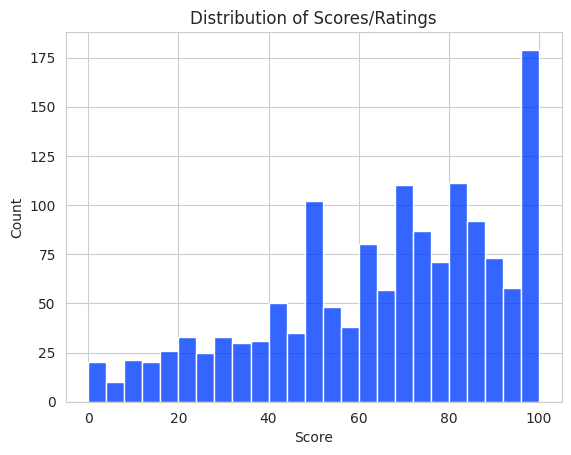

In [ ]:
# Plotting Distribution of Scores

sns.histplot(data=final_df_cleaned, x="Score", bins = 25, alpha = 0.8)
plt.title("Distribution of Scores/Ratings")
plt.show()

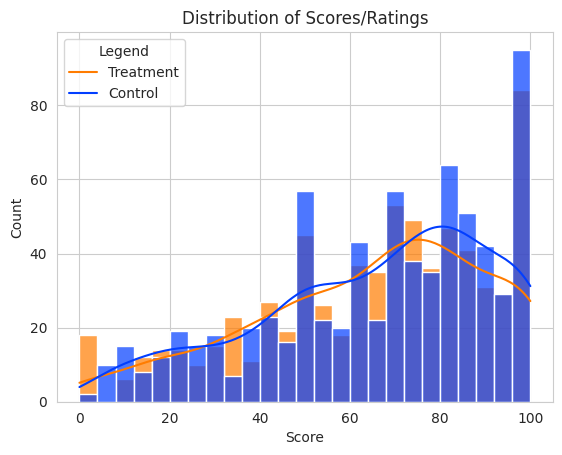

In [ ]:
# Plotting Distribution of Scores based on Treatment and Control

sns.histplot(data=final_df_cleaned, x="Score", hue = "Any_Treatment", kde = True, bins = 25, alpha = 0.7)
plt.title("Distribution of Scores/Ratings")

plt.legend(title="Legend", labels=["Treatment", "Control"])

plt.show()

In [ ]:
df_cleaned

,StartDate,EndDate,Duration (in seconds),Finished,Age,Gender,Attend_BU,BU_School,1,2,...,18,19,20,21,22,Any_Treatment,StartHour,EndHour,Mean_Score,User_ID
0,2024-02-27 16:32:59,2024-02-27 16:34:44,105,True,18 - 24,Male,Yes,Questrom School of Business,NaN,77.0,...,64.0,NaN,NaN,NaN,30.0,1,16,16,71.9,1
3,2024-02-27 18:28:51,2024-02-27 18:30:36,104,True,18 - 24,Male,Yes,Questrom School of Business,NaN,NaN,...,0.0,62.0,60.0,NaN,87.0,1,18,18,57.5,2
5,2024-02-27 18:29:36,2024-02-27 18:30:53,76,True,18 - 24,Male,Yes,Questrom School of Business,37.0,100.0,...,51.0,NaN,NaN,NaN,76.0,1,18,18,72.4,3
7,2024-02-27 18:30:48,2024-02-27 18:32:06,78,True,18 - 24,Female,Yes,Questrom School of Business,100.0,100.0,...,NaN,NaN,NaN,40.0,NaN,1,18,18,70.9,4
11,2024-02-27 18:36:16,2024-02-27 18:41:37,321,True,25 - 34,Male,Yes,Questrom School of Business,NaN,86.0,...,19.0,NaN,77.0,51.0,NaN,1,18,18,68.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2024-02-28 16:49:23,2024-02-28 16:50:25,61,True,25 - 34,Female,No,NaN,NaN,NaN,...,41.0,82.0,63.0,23.0,NaN,0,16,16,57.6,140
161,2024-02-28 20:37:47,2024-02-28 20:39:08,80,True,18 - 24,Female,Yes,Questrom School of Business,53.0,11.0,...,NaN,NaN,NaN,50.0,NaN,0,20,20,54.3,141
162,2024-02-28 20:57:09,2024-02-28 20:59:26,137,True,25 - 34,Male,No,NaN,NaN,70.0,...,20.0,85.0,71.0,NaN,80.0,0,20,20,63.1,142
163,2024-02-29 00:12:08,2024-02-29 00:14:13,124,True,18 - 24,Male,No,NaN,NaN,NaN,...,NaN,NaN,100.0,90.0,NaN,0,0,0,91.5,143


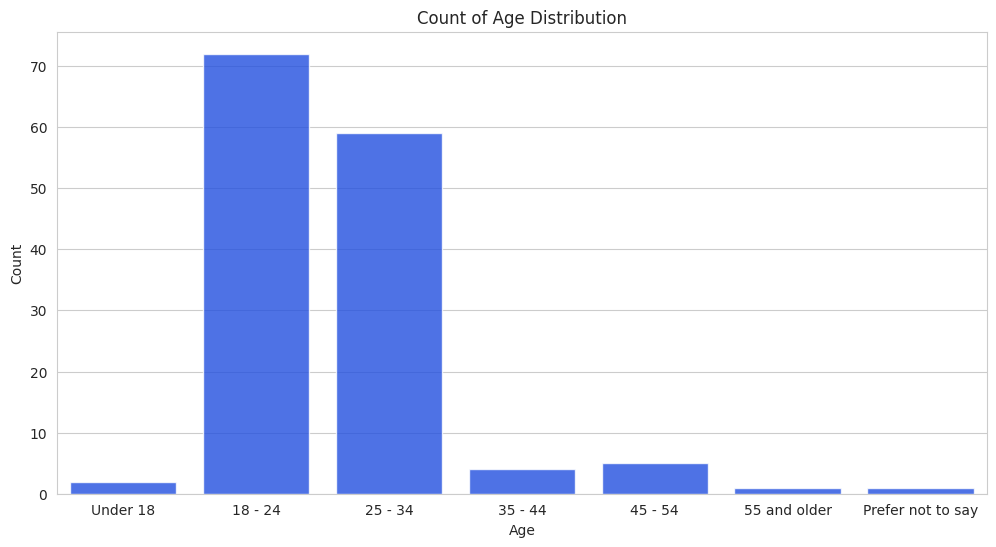

In [ ]:
# Distribution of Age Groups
age_order = ['Under 18', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 and older', 'Prefer not to say']

df_cleaned['Age'] = pd.Categorical(df_cleaned['Age'], categories=age_order, ordered=True)

plt.figure(figsize=(12, 6))

sns.countplot(data=df_cleaned, x='Age', alpha=0.8)

plt.title('Count of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

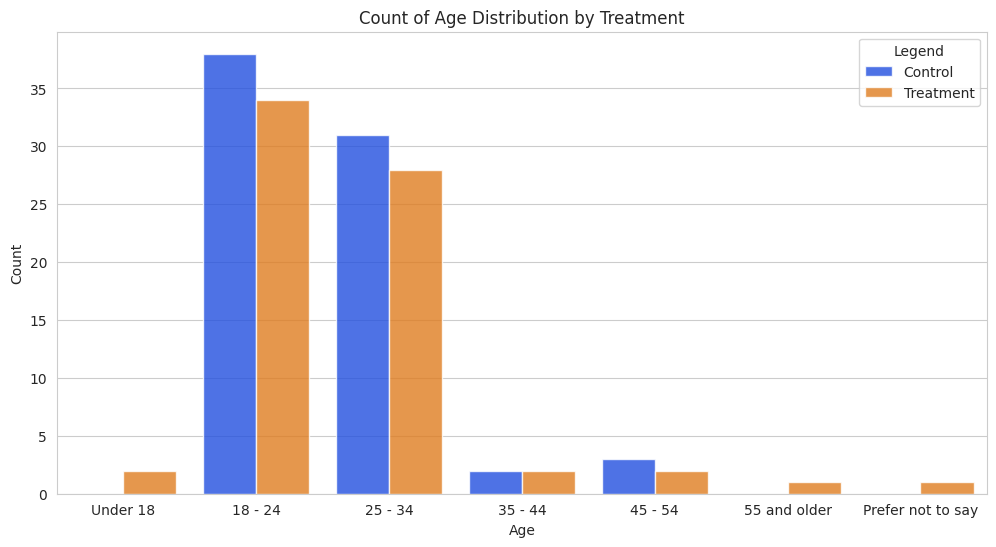

In [ ]:
# Distribution of Age Groups based on label
age_order = ['Under 18', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 and older', 'Prefer not to say']

df_cleaned['Age'] = pd.Categorical(df_cleaned['Age'], categories=age_order, ordered=True)
plt.figure(figsize=(12, 6))

sns.countplot(data=df_cleaned, x='Age', hue='Any_Treatment', alpha = 0.8)

plt.title('Count of Age Distribution by Treatment')
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend(title="Legend", labels=["Control", "Treatment"])


plt.show()

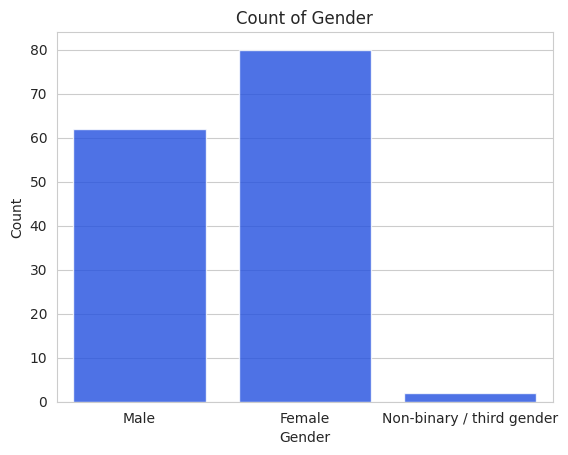

In [ ]:
# Count of Gender
sns.countplot(data=df_cleaned, x='Gender', alpha=0.8)

plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

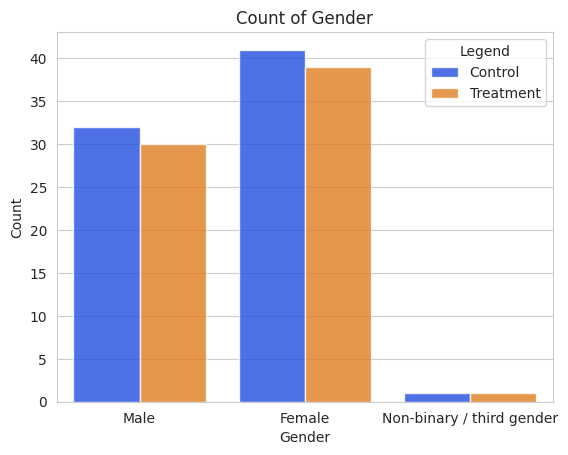

In [ ]:
# Count of Gender based on Treatment and control
sns.countplot(data=df_cleaned, x='Gender', hue = "Any_Treatment", alpha=0.8)

plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title="Legend", labels=["Control", "Treatment"])

plt.show()

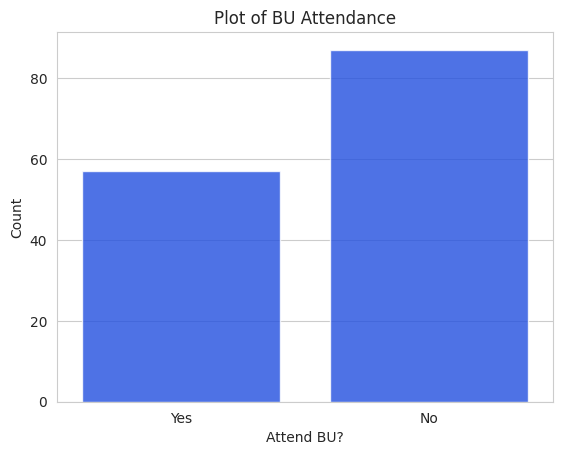

In [ ]:
# Distribution of whether responders attend BU or not
sns.countplot(data=df_cleaned, x='Attend_BU',  alpha=0.8)

plt.title('Plot of BU Attendance')
plt.xlabel('Attend BU?')
plt.ylabel('Count')

plt.show()

In [ ]:
df_attend_bu = df_cleaned[['Attend_BU', 'Any_Treatment']].value_counts().reset_index()
df_attend_bu.columns = ['Attend_BU', 'Any_Treatment', 'Counts']

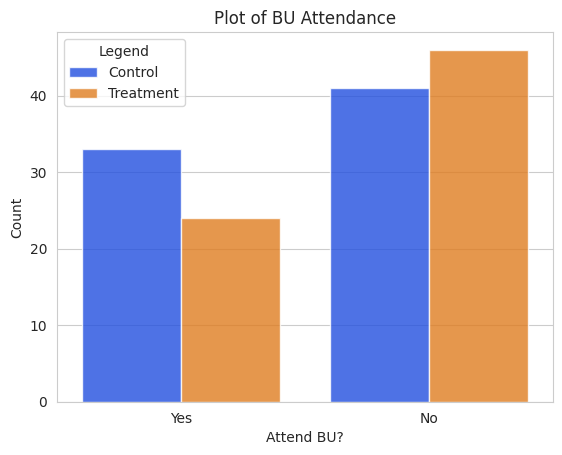

In [ ]:
# Distribution of whether responders attend BU or not
sns.countplot(data=df_cleaned, x='Attend_BU', hue = "Any_Treatment", alpha=0.8)

plt.title('Plot of BU Attendance')
plt.xlabel('Attend BU?')
plt.ylabel('Count')
plt.legend(title="Legend", labels=["Control", "Treatment"])

plt.show()

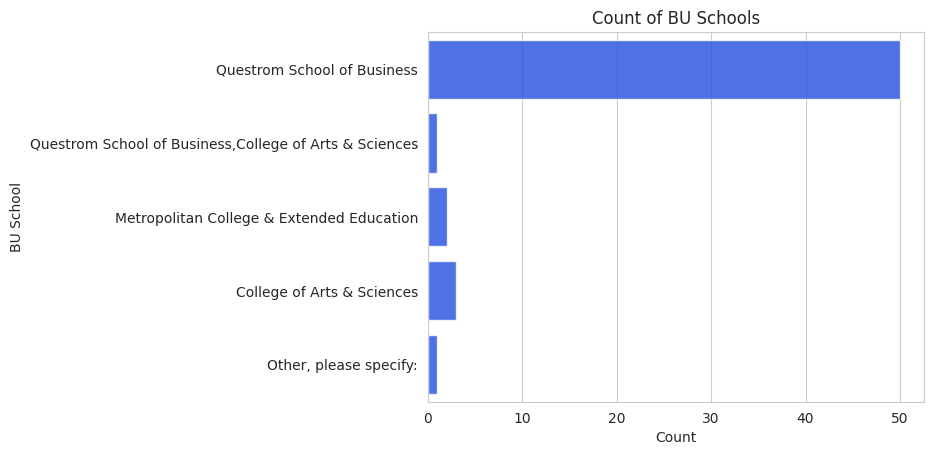

In [ ]:
# Distribution across BU Schools

sns.countplot(data=df_cleaned, y='BU_School', alpha = 0.8)

plt.title('Count of BU Schools')
plt.xlabel('Count')
plt.ylabel('BU School')

plt.show()

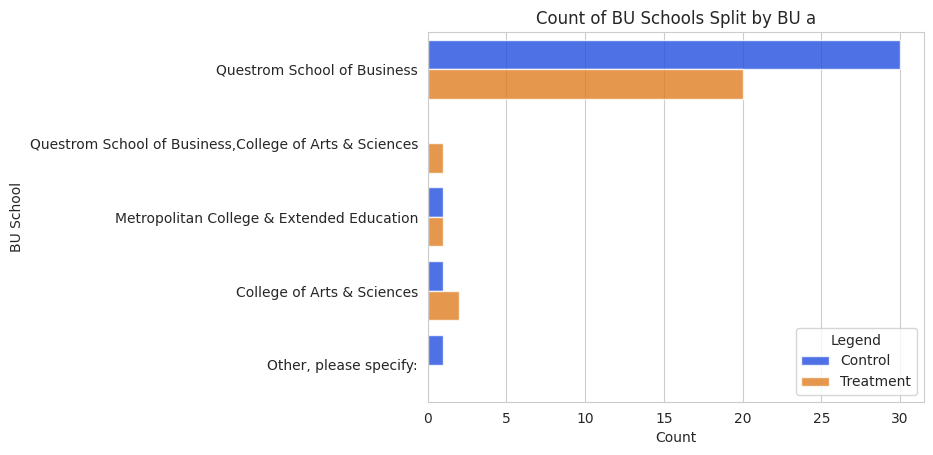

In [ ]:
# Distribution across BU Schools between Treatment and Control

sns.countplot(data=df_cleaned, y='BU_School', hue = "Any_Treatment", alpha = 0.8)

plt.title('Count of BU Schools Split by BU a')
plt.xlabel('Count')
plt.ylabel('BU School')

plt.legend(title="Legend", labels=["Control", "Treatment"])

plt.show()

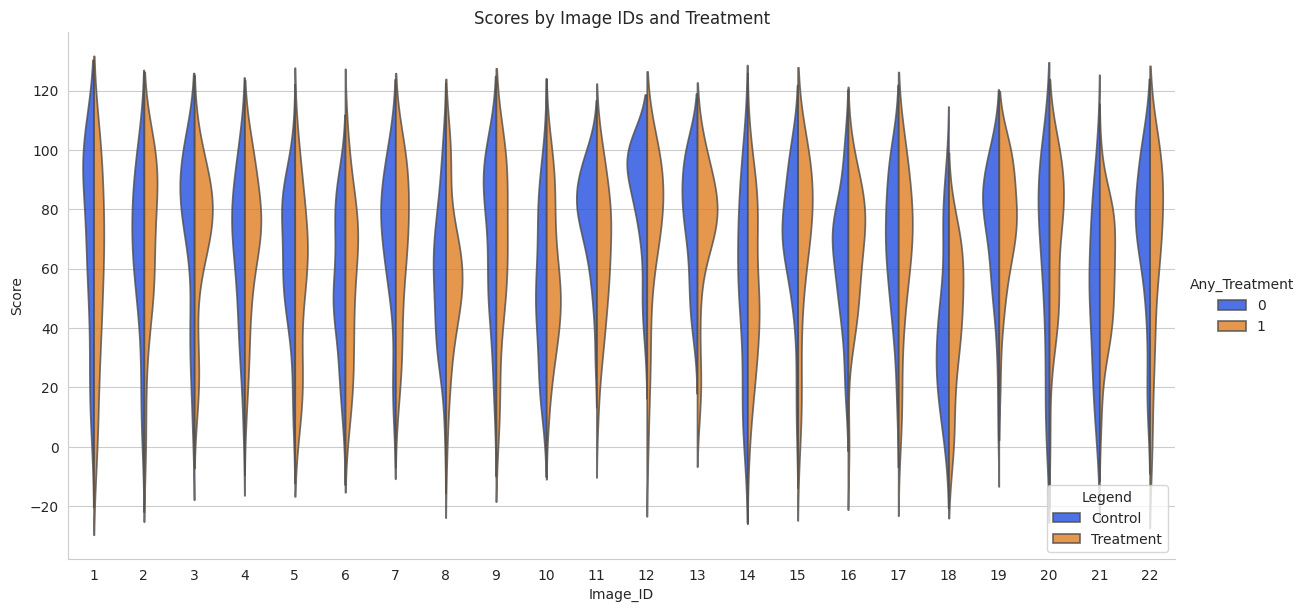

In [ ]:
# Define the order of Image_ID from 1 to 22
image_id_order = list(range(1, 23))

# Scores by Image ID and Treatment in a Violin Plot
sns.catplot(data=final_df_cleaned, x='Image_ID', y='Score', hue='Any_Treatment', kind='violin', split=True, height=6, aspect=2, inner=None, order=image_id_order, alpha = 0.8)
plt.title('Scores by Image IDs and Treatment')
plt.legend(title="Legend", labels=["Control", "Treatment"], loc="lower right")
plt.show()

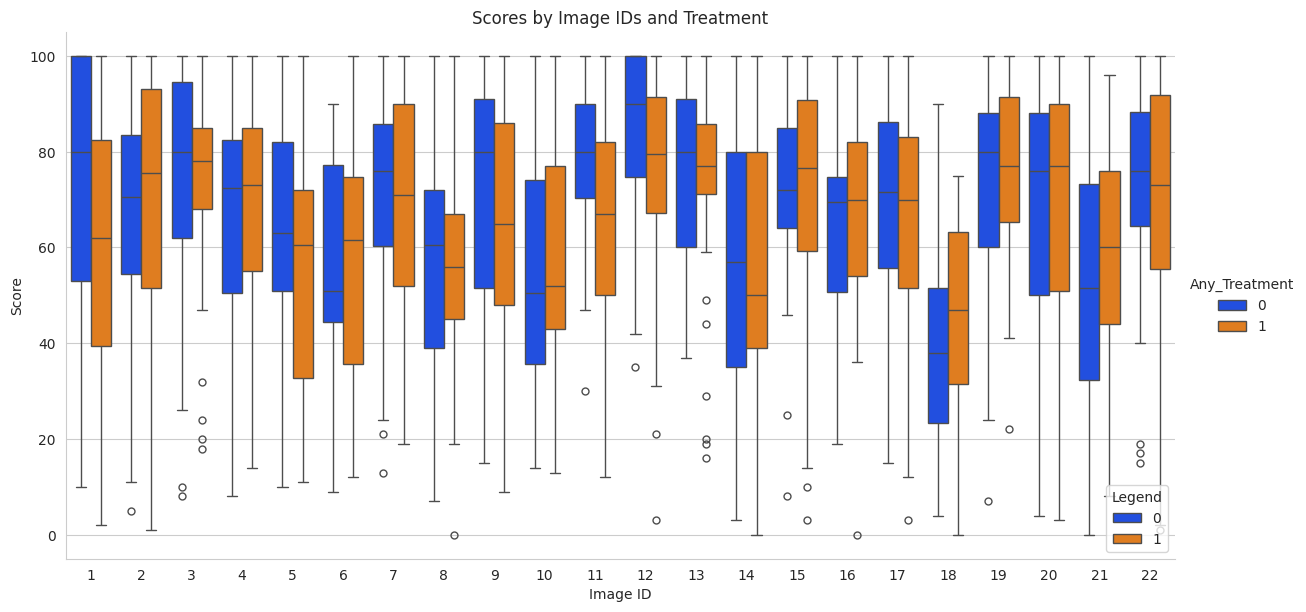

In [ ]:
# Scores by Image ID and Treatment in a Box Plot
sns.catplot(data=final_df_cleaned, x='Image_ID', y='Score', hue='Any_Treatment', kind='box', height=6, aspect=2, order=image_id_order)
plt.title('Scores by Image IDs and Treatment')
plt.xlabel("Image ID")  # Set x-axis label
plt.ylabel("Score")
plt.legend(title="Legend", loc="lower right")
plt.show()

<Figure size 1000x600 with 0 Axes>

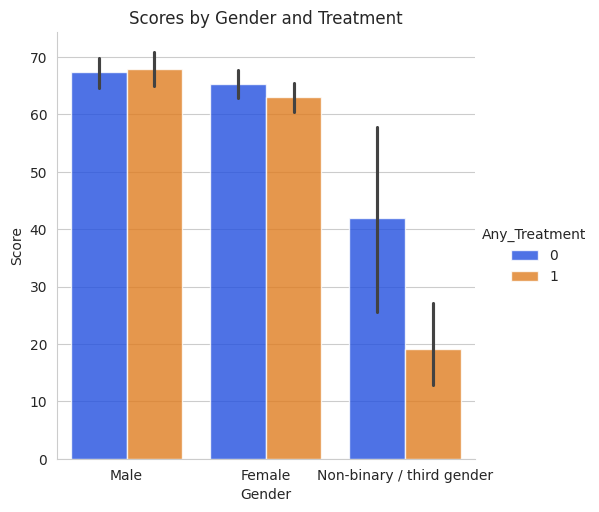

In [ ]:
# Scores by Gender & Treatment
plt.figure(figsize=(10, 6))
sns.catplot(kind = "bar", data=final_df_cleaned, x='Gender', y='Score', hue='Any_Treatment', alpha = 0.8)

plt.title('Scores by Gender and Treatment')
plt.xlabel('Gender')
plt.ylabel('Score')

plt.show()

<ipython-input-51-8609511a319f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_cleaned['Age'] = pd.Categorical(final_df_cleaned['Age'], categories=age_order, ordered=True)


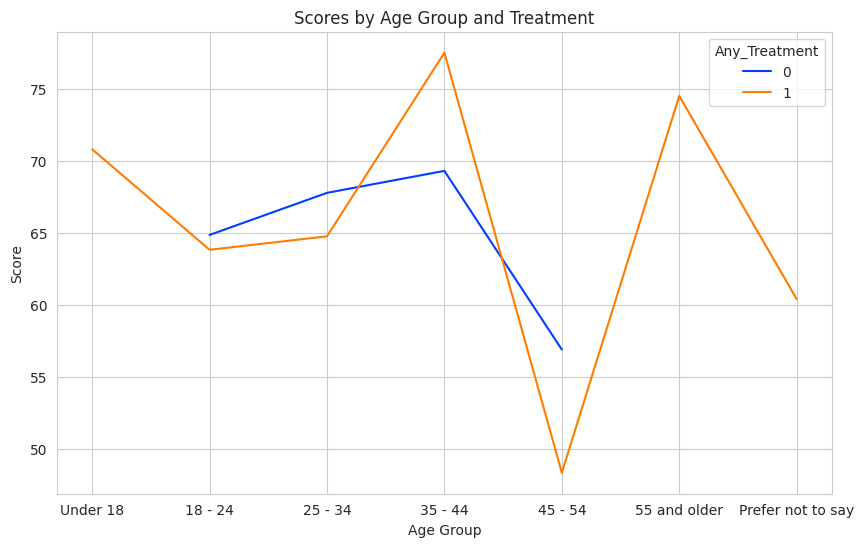

In [ ]:
# Scores by Age group & Treatment
age_order = ['Under 18', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 and older', 'Prefer not to say']

final_df_cleaned['Age'] = pd.Categorical(final_df_cleaned['Age'], categories=age_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=final_df_cleaned, x='Age', y='Score', hue='Any_Treatment', errorbar=None)

plt.title('Scores by Age Group and Treatment')
plt.xlabel('Age Group')
plt.ylabel('Score')

plt.show();

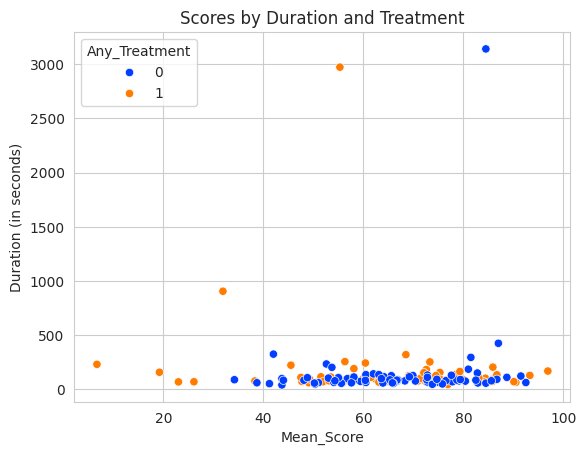

In [ ]:
# Scores by Duration & Treatment
sns.scatterplot(data=df_cleaned, x='Mean_Score', y='Duration (in seconds)', hue='Any_Treatment')
plt.title('Scores by Duration and Treatment')
plt.show();

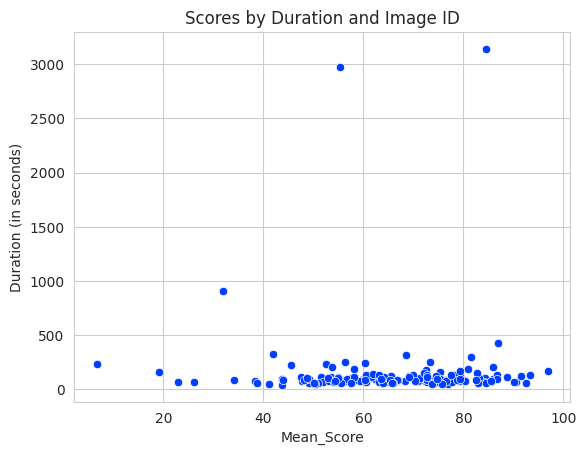

In [ ]:
# Scores by Duration & Image ID
sns.scatterplot(data=df_cleaned, x='Mean_Score', y='Duration (in seconds)')
plt.title('Scores by Duration and Image ID')
plt.show();

In [ ]:
# Plotting Mean Score by Start Hour of the survey
mean_score_by_start_hour = df_cleaned.groupby("StartHour")["Mean_Score"].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x=mean_score_by_start_hour.index,
                         y=mean_score_by_start_hour.values,
                         mode='lines+markers',
                         marker=dict(color='blue'),
                         line=dict(width=2),
                         name='Mean Score'))

fig.update_layout(title='Mean Score vs Start Hour',
                  xaxis_title='Start Hour',
                  yaxis_title='Mean Score',
                  xaxis=dict(tickvals=list(range(24))),
                  yaxis=dict(gridcolor='lightgray'),
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [ ]:
# Plotting no. of responses recorded by start hour of the survey
count_by_start_hour = df_cleaned['StartHour'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=count_by_start_hour.index,
                         y=count_by_start_hour.values,
                         mode='lines+markers',
                         marker=dict(color='blue'),
                         line=dict(width=2),
                         name='Count'))

fig.update_layout(title='Count of Observations vs Start Hour',
                  xaxis_title='Start Hour',
                  yaxis_title='Count',
                  xaxis=dict(tickvals=list(range(24))),
                  yaxis=dict(gridcolor='lightgray'),
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [ ]:
# Plotting the above to plots together to get a sense of the responses by hour of day
fig = go.Figure()

fig.add_trace(go.Scatter(x=mean_score_by_start_hour.index,
                         y=mean_score_by_start_hour.values,
                         mode='lines+markers',
                         marker=dict(color='blue'),
                         line=dict(width=2),
                         name='Mean Score'))

fig.add_trace(go.Scatter(x=count_by_start_hour.index,
                         y=count_by_start_hour.values,
                         mode='lines+markers',
                         marker=dict(color='red'),
                         line=dict(width=2),
                         name='Count'))

fig.update_layout(title='Mean Score and Count of Observations vs Start Hour',
                  xaxis_title='Start Hour',
                  yaxis_title='Value',
                  xaxis=dict(tickvals=list(range(24))),
                  yaxis=dict(gridcolor='lightgray'),
                  plot_bgcolor='rgba(0,0,0,0)',
                  width=800,
                  height=500)
fig.show()

# Post-Experiment Checks

#### Proportions Z-test

In [ ]:
# Checking for randomization in treatment and control groups
z_stat, p_value = proportions_ztest(df_cleaned["Any_Treatment"].value_counts()[1], len(df_cleaned["Any_Treatment"]), 0.5)

# Print the Z-test statistic and p-value
print("Z-test statistic:", z_stat)
print("P-value:", p_value)

Z-test statistic: -0.3334620086260372
P-value: 0.7387855626520152


In [ ]:
# Checking for randomization in the images shown to each user out of a total of 22 images
print("Distribution of the number of times each of 22 images were shown:")
print(final_df_cleaned["Image_ID"].value_counts())

Distribution of the number of times each of 22 images were shown:
21    75
20    72
19    71
14    70
22    70
13    69
10    68
16    67
17    67
2     66
6     66
8     65
12    64
1     64
3     64
11    63
15    63
9     63
18    60
4     59
5     57
7     57
Name: Image_ID, dtype: int64


In [ ]:
# Checking for the most shown image
z_stat, p_value = proportions_ztest(final_df_cleaned["Image_ID"].value_counts()[0],
                                    len(final_df_cleaned["Image_ID"]),
                                    1/final_df_cleaned["Image_ID"].nunique())
print("Z-test statistic w.r.t. most shown image:", z_stat)
print("P-value w.r.t. most shown image         :", p_value)
print("\n")

# Checking for the least shown image
z_stat, p_value = proportions_ztest(final_df_cleaned["Image_ID"].value_counts()[-1],
                                    len(final_df_cleaned["Image_ID"]),
                                    1/final_df_cleaned["Image_ID"].nunique())
print("Z-test statistic w.r.t. least shown image:", z_stat)
print("P-value w.r.t. least shown image:        ", p_value)

Z-test statistic w.r.t. most shown image: 1.1320898654460456
P-value w.r.t. most shown image         : 0.25759665519286223


Z-test statistic w.r.t. least shown image: -1.1426756992799223
P-value w.r.t. least shown image:         0.25317326285880204


#### Power Test

In [ ]:
# Power Test to Calculate the Necessary Power for the Experiment, Results Obtained from Another Paper

true_effect = -1.76
sd_outcome = 19.57
true_effect_size = true_effect/sd_outcome

n = TTestPower().solve_power(effect_size = true_effect_size, nobs=None, alpha=0.05, power=0.8, alternative='two-sided')
print(f"Necessary sample size: {np.ceil(n)}")

Necessary sample size: 973.0


# Analysis & Results

### Regression

In [ ]:
# Running Regression Models with only Any_Treatment

model_score_simple = feols(f"Score ~ Any_Treatment", data=final_df_cleaned).vcov("hetero")

model_mean_score_ = feols(f"Mean_Score ~ Any_Treatment", data=final_df_cleaned).vcov("hetero")

etable([model_score_simple, model_mean_score_])

                            est1               est2
-------------  -----------------  -----------------
depvar                     Score         Mean_Score
---------------------------------------------------
Intercept      65.874*** (0.948)  65.874*** (0.508)
Any_Treatment     -1.426 (1.363)     -1.426 (0.841)
---------------------------------------------------
---------------------------------------------------
R2                         0.001              0.002
S.E. type                 hetero             hetero
Observations                1440               1440
---------------------------------------------------
Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001
Format of coefficient cell:
Coefficient (Std. Error)


In [ ]:
# Running Regression Models with Image Score as the outcome variable

model_score = feols(f"Score ~ Any_Treatment + Age + Gender + Attend_BU + Image_ID", data=final_df_cleaned).vcov("hetero")

model_score_simple = feols(f"Score ~ Any_Treatment + Age + Gender + Image_ID", data=final_df_cleaned).vcov("hetero")

model_score_fe = feols(f"Score ~ Any_Treatment + Age + Gender + Attend_BU | Image_ID", data=final_df_cleaned).vcov("hetero")

etable([model_score, model_score_simple, model_score_fe])

                                                   est1                est2                est3
-----------------------------------  ------------------  ------------------  ------------------
depvar                                            Score               Score               Score
-----------------------------------------------------------------------------------------------
Intercept                             69.806*** (5.725)   69.595*** (5.724)
Any_Treatment                            -2.468 (1.311)      -2.032 (1.298)      -2.468 (1.301)
Age[T.18 - 24]                           -2.318 (4.402)      -4.428 (4.367)      -2.318 (4.368)
Age[T.25 - 34]                           -1.953 (4.412)      -3.042 (4.391)      -1.953 (4.378)
Age[T.35 - 44]                            3.297 (5.406)       2.419 (5.432)       3.297 (5.365)
Age[T.45 - 54]                        -16.647** (5.149)  -17.247*** (5.128)   -16.647** (5.109)
Age[T.55 and older]                       7.273 (5.138)     

In [ ]:
# Running Regression Models with Mean Score for all images as the outcome variable

model_1 = feols("Mean_Score ~ Any_Treatment + Age | Image_ID", data=final_df_cleaned).vcov("hetero")

model_2 = feols("Mean_Score ~ Any_Treatment + Gender | Image_ID", data=final_df_cleaned).vcov("hetero")

etable([model_1, model_2])

                                                   est1                est2
-----------------------------------  ------------------  ------------------
depvar                                       Mean_Score          Mean_Score
---------------------------------------------------------------------------
Any_Treatment                           -1.867* (0.852)      -1.371 (0.807)
Age[T.18 - 24]                          -7.457* (3.507)
Age[T.25 - 34]                           -5.508 (3.560)
Age[T.35 - 44]                            1.329 (4.212)
Age[T.45 - 54]                       -18.715*** (3.536)
Age[T.55 and older]                       3.726 (3.463)
Age[T.Prefer not to say]              -10.373** (3.472)
Gender[T.Male]                                             3.576*** (0.814)
Gender[T.Non-binary / third gender]                      -33.771*** (2.486)
---------------------------------------------------------------------------
Image_ID                                              x 

In [ ]:
# Running Regression Models with Mean Score for all images as the outcome variable

model_Mean_Score = feols(f"Mean_Score ~ Any_Treatment + Age + Gender + Attend_BU + Image_ID", data=final_df_cleaned).vcov("hetero")

model_Mean_Score_simple = feols(f"Mean_Score ~ Any_Treatment + Age + Gender + Image_ID", data=final_df_cleaned).vcov("hetero")

model_Mean_Score_fe = feols(f"Mean_Score ~ Any_Treatment + Age + Gender + Attend_BU | Image_ID", data=final_df_cleaned).vcov("hetero")

etable([model_Mean_Score, model_Mean_Score_simple, model_Mean_Score_fe])

                                                   est1                est2                est3
-----------------------------------  ------------------  ------------------  ------------------
depvar                                       Mean_Score          Mean_Score          Mean_Score
-----------------------------------------------------------------------------------------------
Intercept                             70.860*** (3.655)   70.673*** (3.651)
Any_Treatment                          -2.163** (0.820)     -1.775* (0.821)    -2.163** (0.813)
Age[T.18 - 24]                           -4.698 (3.162)     -6.574* (3.127)      -4.698 (3.137)
Age[T.25 - 34]                           -3.543 (3.189)      -4.512 (3.177)      -3.543 (3.164)
Age[T.35 - 44]                            2.251 (3.955)       1.470 (3.987)       2.251 (3.924)
Age[T.45 - 54]                       -17.640*** (3.172)  -18.174*** (3.157)  -17.640*** (3.148)
Age[T.55 and older]                       5.535 (3.119)     

### CATE

In [ ]:
# Running Regression Models with Score for all images as the outcome variable for CATE

model_score_gender = feols(f"Score ~ Any_Treatment * Gender + Age + Attend_BU | Image_ID", data=final_df_cleaned).vcov("hetero")

model_score_bu = feols(f"Score ~ Any_Treatment * Attend_BU + Age + Gender | Image_ID", data=final_df_cleaned).vcov("hetero")

etable([model_score_gender, model_score_bu])

                                                                 est1                est2
-------------------------------------------------  ------------------  ------------------
depvar                                                          Score               Score
-----------------------------------------------------------------------------------------
Any_Treatment                                         -3.984* (1.823)      -2.095 (1.634)
Gender[T.Male]                                          2.174 (1.786)     4.251** (1.304)
Gender[T.Non-binary / third gender]                 -25.089** (8.121)  -36.297*** (5.274)
Age[T.18 - 24]                                         -2.107 (4.220)      -2.086 (4.411)
Age[T.25 - 34]                                         -1.523 (4.231)      -1.787 (4.392)
Age[T.35 - 44]                                          4.655 (5.300)       3.388 (5.370)
Age[T.45 - 54]                                     -16.505*** (4.987)   -16.500** (5.118)
Age[T.55 a

In [ ]:
# Running Regression Models with Mean Score for all images as the outcome variable for CATE

model_mean_score_gender = feols(f"Mean_Score ~ Any_Treatment * Gender + Age + Attend_BU | Image_ID",
                                data=final_df_cleaned).vcov("hetero")

model_mean_score_bu = feols(f"Mean_Score ~ Any_Treatment * Attend_BU + Age + Gender | Image_ID",
                            data=final_df_cleaned).vcov("hetero")

etable([model_mean_score_gender, model_mean_score_bu])

                                                                 est1                est2
-------------------------------------------------  ------------------  ------------------
depvar                                                     Mean_Score          Mean_Score
-----------------------------------------------------------------------------------------
Any_Treatment                                       -3.989*** (1.121)      -1.603 (1.084)
Gender[T.Male]                                          1.282 (1.021)    3.688*** (0.828)
Gender[T.Non-binary / third gender]                -25.286*** (1.085)  -35.570*** (2.615)
Age[T.18 - 24]                                         -4.434 (2.872)      -4.350 (3.178)
Age[T.25 - 34]                                         -3.116 (2.906)      -3.294 (3.176)
Age[T.35 - 44]                                          3.796 (3.750)       2.387 (3.928)
Age[T.45 - 54]                                     -17.505*** (2.898)  -17.420*** (3.164)
Age[T.55 a

### Power Test

In [ ]:
# Calculating ATE and STD for our own Power calculation
ATE = final_df_cleaned[final_df_cleaned["Any_Treatment"]==1]["Score"].mean() - final_df_cleaned[final_df_cleaned["Any_Treatment"]==0]["Score"].mean()
print("Average Treatment Effect observed =", ATE)

STD = df_cleaned["Mean_Score"].std()
print("Standard deviation in the outcome =", STD)

Average Treatment Effect observed = -1.4257528957528933
Standard deviation in the outcome = 15.894587057463076


In [ ]:
# Calculating Power of our experiment
effect_size = ATE / STD
sample_size = len(df_cleaned)

print("Effect Size (Cohen's D) =", effect_size)
print("Sample Size of the experiment =", sample_size)

power_calculator = TTestPower()
power = power_calculator.solve_power(effect_size=effect_size,
                                     nobs=sample_size,
                                     alpha=0.05,
                                     power=None,
                                     alternative='two-sided')

print("Statistical Power:", np.round(power, 3))

Effect Size (Cohen's D) = -0.08970053079066634
Sample Size of the experiment = 144
Statistical Power: 0.188


# Balance Check

In [ ]:
# Mapping categorical columns that we want to do balance checks for
gender_mapping = {'Male': 0, 'Female': 1}
attendbu_mapping = {"No": 0, "Yes": 1}
age_mapping = {'Under 18': 0, '18 - 24': 1, '25 - 34': 2, '35 - 44': 3, '45 - 54': 4, '55 and older': 5, 'Prefer not to say': 6}

df_cleaned['Gender_Bool'] = df_cleaned['Gender'].map(gender_mapping)
df_cleaned['Attend_BU_Bool'] = df_cleaned['Attend_BU'].map(attendbu_mapping)
df_cleaned['Age_Bool'] = df_cleaned['Age'].map(age_mapping).astype(int)

In [ ]:
# Performing Balance Checks between Treatment & Control groups

balance_test_Age = smf.ols("Age_Bool ~ Any_Treatment", data=df_cleaned).fit(cov_type='HC1')

balance_test_BU = smf.ols("Attend_BU_Bool ~ Any_Treatment", data=df_cleaned).fit(cov_type='HC1')

balance_test_Gender = smf.ols("Gender_Bool ~ Any_Treatment", data=df_cleaned).fit(cov_type='HC1')

Stargazer([balance_test_Age, balance_test_BU, balance_test_Gender])